## Diffusion equation

Aim: To experiment with a forward in time, centred in space
scheme for integrating the linear diffusion equation

\begin{equation}
\frac{\partial \phi}{\partial t} = K \frac{\partial^2 \phi}{\partial x^2}
\end{equation}

on a periodic domain $0 \le x \le 1$. The initial condition is
given as

\begin{equation}
\phi(x,0) = \left\{
\begin{array}{l}
1\ \ \ \ \mathrm{if\ } 1/4 \le x \le 3/4 \\
0\ \ \ \ \mathrm{otherwise}
\end{array}
\right.
\end{equation}

Write a python procedure to solve this using a forward in time, centered in space method. Take $\Delta x=1/20$
and $\Delta t=0.001$. You can use numpy arrays to store the solution and you might find the numpy routines linspace and roll useful.


Run the procedure. Is the output what you expect? Experiment with the
initial conditions. What happens to a sine wave? Or half a sine wave?


Modify the procedure to use double the number of grid points in
the $x$-direction, and compile and run it again? Is the
solution more accurate? What happens?

Use the theory given in lectures to calculate the maximum stable
timestep at this new resolution. Modify the procedure to use
a stable time step and compile it and run it again. Now is
it more accurate than before?

### Extension

Create a new procedure that uses a
backward Euler time step instead of a forward Euler time step. You
will have to formulate the tridiagonal system of simultaneous
equations for the $\phi_j^{n+1}$, then numpy functions to solve that system.

Run your new procedure for the original $\Delta x$
and $\Delta t$.
Compare the accuracy of the two schemes.

Now double the number of grid points in the $x$-direction
and recompile and run your new procedure. Does it remain stable?
How big can you make the time step without it blowing up?




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def create_space(space_parameters):
  space_start = space_parameters[0]
  space_end = space_parameters[1]
  space_step = space_parameters[2]
  # Add one here to account for end (or start) of array
  number_of_samples = int((space_end - space_start) / space_step) + 1
  x_space = np.linspace(space_start, space_end, number_of_samples)
  return x_space

In [42]:
def create_initial_phi(x_space):
  return np.where((x_space >= 0.25) & (x_space <= 0.75), 1, 0)

In [66]:
def forward_euler_time_step(x_parameters, t_parameters, initial_phi, K):
  x_step = x_parameters[2]
  t_step = t_parameters[2]

  x_space = create_space(x_parameters)
  t_space = create_space(t_parameters)

  phi = create_initial_phi(x_space)
  phi_values = np.array([phi])
  for time in t_space:
    phi_next = ((K * t_step) / (x_step)**2) * (np.roll(phi, -1) - 2 * phi + np.roll(phi, 1)) + phi
    phi = phi_next

    phi_values = np.vstack([phi_values, phi])

  return phi_values

In [56]:
# Parameters
x_start = 0
x_end = 1
x_step = 0.05
x_parameters = (x_start, x_end, x_step)

t_start = 0
t_end = 0.1
t_step = 0.001
t_parameters = (t_start, t_end, t_step)

K = 1

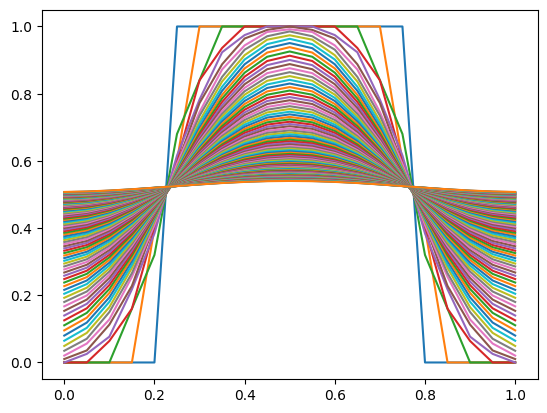

In [70]:
a = forward_euler_time_step(x_parameters, t_parameters, initial_phi, K)
x_space = create_space(x_parameters)
plt.plot(x_space, np.transpose(a))
plt.show()
plt.close()